In [ ]:
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression')

from mps_ND import NDMPS
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from utils_ND import *
from copy import deepcopy

In [61]:
mri_file = '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-01_T1w.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(160, 192, 192)


In [59]:
a= [1,2,3,4,5]
a[0:4]

[1, 2, 3, 4]

In [40]:
fmri_file = '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/fMRI_Datatset/sub-01_task-Classificationprobewithoutfeedback_bold.nii.gz'
fimg = nib.load(fmri_file)
fimg_data = fimg.get_fdata()
print(type(fimg_data))  # it's a numpy array!
print(fimg_data.shape)

<class 'numpy.ndarray'>
(64, 64, 30, 240)


np.float64(5430.580079512685)

(128, 128)


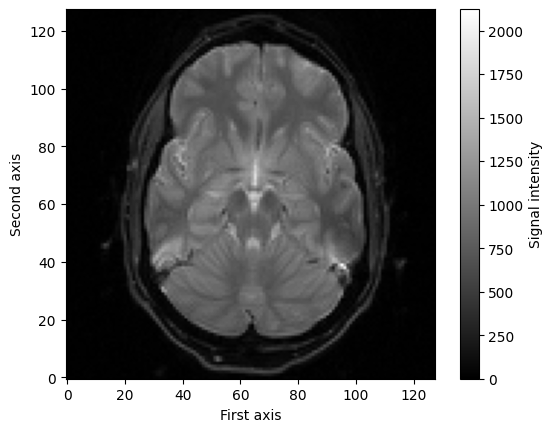

In [52]:
mid_slice_x = img_data[:, :, 10]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

(80, 44)


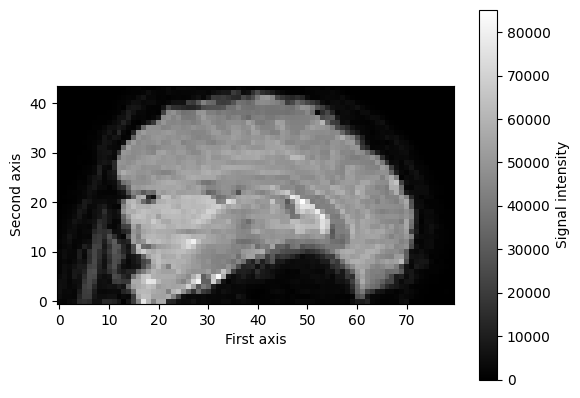

In [7]:
fmid_slice_x = fimg_data[40, :, :,1]
print(fmid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(fmid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [12]:
mps_MRI = NDMPS.from_tensor(img_data, norm = False)

/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression/utils_ND.py:84: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100


In [13]:
mps_MRI.compression_ratio()

np.float64(0.819056581439394)

In [14]:
mps_MRI.continuous_compress(0.03)

Compression ratio at 0.0003: 0.819056581439394
Compression ratio at 0.0015: 0.473772490530303
Compression ratio at 0.003: 0.41343158143939396
Compression ratio at 0.006: 0.40560961174242427
Compression ratio at 0.015: 0.3411134785353535
Compression ratio at 0.024: 0.25404379734848487
Compression ratio at 0.03: 0.2131445707070707


In [15]:
mps_MRI.compression_ratio()

np.float64(0.2131445707070707)

In [16]:
recovered_MRI = mps_MRI.to_tensor()

y: 10:220
z: :175
x: 40:200

In [24]:
avg_SSIM_3D(img_data, recovered_MRI)

np.float64(0.9351497734384476)

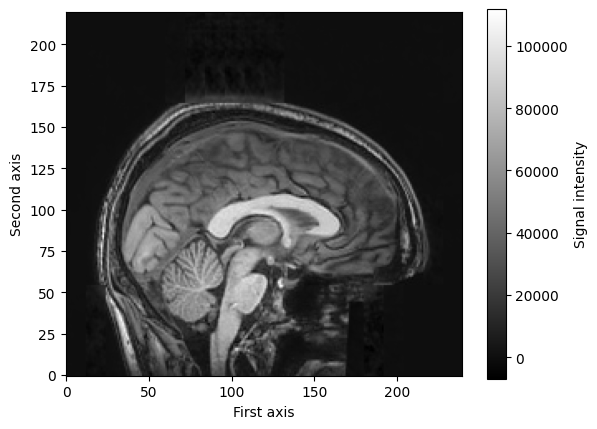

In [17]:
plt.imshow(recovered_MRI[119,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [20]:
mps_fMRI = NDMPS.from_tensor(fimg_data, norm = False)


/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression/utils_ND.py:84: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100


 200 440 
>━━━>━━━●
│   │   │


In [21]:
mps_fMRI.mps.show()

 200 440 
>━━━>━━━●
│   │   │


In [23]:
mps_fMRI.continuous_compress(0.03)

Compression ratio at 0.0003: 1.016590909090909
Compression ratio at 0.0015: 0.9163068181818181
Compression ratio at 0.003: 0.83346875
Compression ratio at 0.006: 0.42865625
Compression ratio at 0.015: 0.07954545454545454
Compression ratio at 0.024: 0.021363636363636362
Compression ratio at 0.03: 0.015855113636363636


In [25]:
recovered_fMRI  = mps_fMRI.to_tensor()

In [26]:
avg_SSIM_4D(fimg_data, recovered_fMRI)

np.float64(0.8650237511121172)

In [28]:
a = mps_fMRI.mps.show()

 32 39 
●──●──●
│  │  │


In [36]:
mps_fMRI.mps.bond_sizes()

[32, 39]

In [72]:
def compute_ssim(input_matrix, output_matrix):
    # Assuming input and output images the same size
    input_array = np.array(input_matrix)
    output_array = np.array(output_matrix)
    return ssim(input_array, output_array, data_range=max(input_array.max(), output_array.max()) - min(input_array.min(), output_array.min()))

In [73]:
def compute_SSIM_3D(original, compressed, axis = 0):
    ssim_list = []
    if axis == 0:
        for i in np.arange(original.shape[0]):
            ssim_list.append(compute_ssim(original[i, :, :], compressed[i, :, :]))
    
    elif axis == 1:
        for i in np.arange(original.shape[1]):
            ssim_list.append(compute_ssim(original[:, i, :], compressed[:, i, :]))
    elif axis == 2:
        for i in np.arange(original.shape[2]):
            ssim_list.append(compute_ssim(original[:, :, i], compressed[:, :, i]))
    return ssim_list



In [28]:
axis = 0

In [29]:
ssim_l_clipped = compute_SSIM_3D(img_data, np.clip(recovered_img,0, None), axis = axis)

In [30]:
ssim_l = compute_SSIM_3D(img_data, recovered_img, axis = axis)

In [31]:
recovered_img_flipped = deepcopy(recovered_img)

recovered_img_flipped[recovered_img_flipped < 0] =  recovered_img_flipped[recovered_img_flipped < 0] * -1
ssim_flipped = compute_SSIM_3D(img_data, recovered_img_flipped, axis = axis)

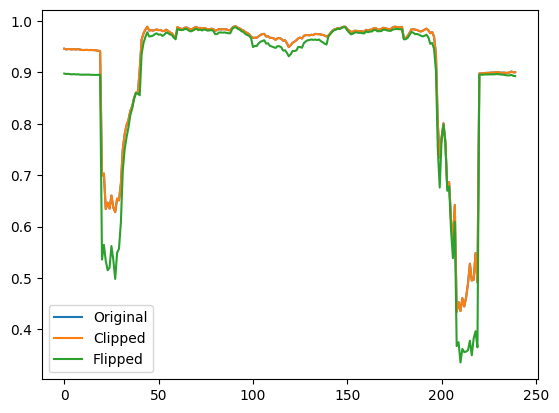

In [32]:
plt.plot(ssim_l, label = 'Original')
plt.plot(ssim_l_clipped, label = 'Clipped')
plt.plot(ssim_flipped, label = 'Flipped')
plt.legend()

In [33]:
np.average(ssim_l), np.average(ssim_l_clipped), np.average(ssim_flipped)

(np.float64(0.9112745339489117),
 np.float64(0.9112745339489117),
 np.float64(0.8892067609633555))

In [35]:
ssim_0 = compute_SSIM_3D(img_data, recovered_img, axis = 0)
ssim_1 = compute_SSIM_3D(img_data, recovered_img, axis = 1)
ssim_2 = compute_SSIM_3D(img_data, recovered_img, axis = 2)

In [36]:
np.average(ssim_0), np.average(ssim_1), np.average(ssim_2)

(np.float64(0.9112745339489117),
 np.float64(0.9378158755334535),
 np.float64(0.9563589108329776))

In [37]:
def avg_SSIM(original, compressed):
    ssim_0 = compute_SSIM_3D(original, compressed, axis = 0)
    ssim_1 = compute_SSIM_3D(original, compressed, axis = 1)
    ssim_2 = compute_SSIM_3D(original, compressed, axis = 2)
    return (np.average(ssim_0) + np.average(ssim_1) + np.average(ssim_2))/3

In [38]:
avg_SSIM(img_data, recovered_img)

np.float64(0.9351497734384476)